# Signal Analysis with Orthogonal Projections
Homework Notebook with Solutions
============================================================
This notebook contains coding exercises for signal analysis using orthogonal projections, with solutions filled in.


## 7. Signal Analysis with Orthogonal Projections

In many applications, signals are mixtures of a few frequencies.
In this problem, you will project a length-𝑝 signal onto a complex-exponential basis and analyze the resultant coefficients.


### (a) Complex Inner Products and Basis Vectors

1. Functions to compute inner product and generate basis vector.


In [2]:
import numpy as np

def complex_inner_product(u, v):
    result = 0+0j
    for i in range(len(u)):
        result += u[i] * np.conjugate(v[i])
    return result
# Note: This could also be done with np.vdot(v, u), but here we show the explicit formula.

def generate_basis_vector(k, p):
    n = np.arange(p)
    return np.exp(1j * 2 * np.pi * k * n / p)

In [3]:
p = 64
psi3 = generate_basis_vector(3, p)
psi10 = generate_basis_vector(10, p)

val = complex_inner_product(psi3, psi10)
print("Inner product:", val)
print("Magnitude:", np.abs(val))

Inner product: (-4.440892098500626e-15-1.0880185641326534e-14j)
Magnitude: 1.1751594028907457e-14


### (b) Generate Signal


In [4]:
def generate_signal(p, frequencies, amplitudes):
    n = np.arange(p)
    t = n / p
    s = np.zeros(p)
    for f, A in zip(frequencies, amplitudes):
        s += A * np.cos(2 * np.pi * f * t)
    return s

# Example usage
frequencies = [2, 8]
amplitudes = [2.0, 0.5]
s = generate_signal(p, frequencies, amplitudes)
print("First 4 samples:", s[:4])

First 4 samples: [2.5        2.31512395 1.84775907 1.30938583]


### (c) Projection Coefficient


In [5]:
def get_projection_coefficient(signal, k, p):
    psi_k = generate_basis_vector(k, p)
    return (1/p) * complex_inner_product(signal, psi_k)

# Example usage
ck = get_projection_coefficient(s, 2, p)
print("c2 =", ck)

c2 = (0.9999999999999998-8.933825901280557e-17j)


### (d) Compute & Plot Coefficients


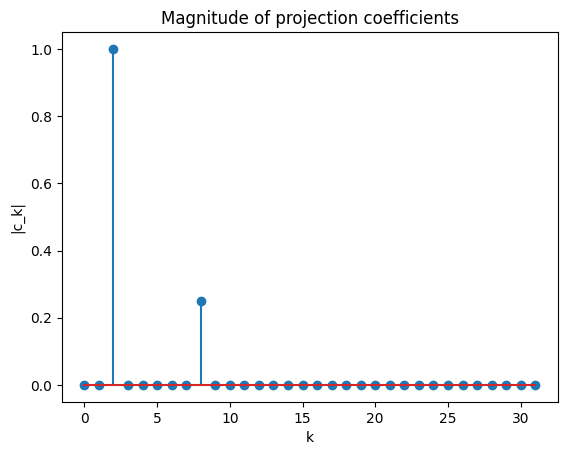

In [8]:
import matplotlib.pyplot as plt

ks = np.arange(0, 32)
coeffs = [get_projection_coefficient(s, k, p) for k in ks]

plt.stem(ks, np.abs(coeffs))
plt.xlabel("k")
plt.ylabel("|c_k|")
plt.title("Magnitude of projection coefficients")
plt.show()

### (e) Repeat with Different Frequencies


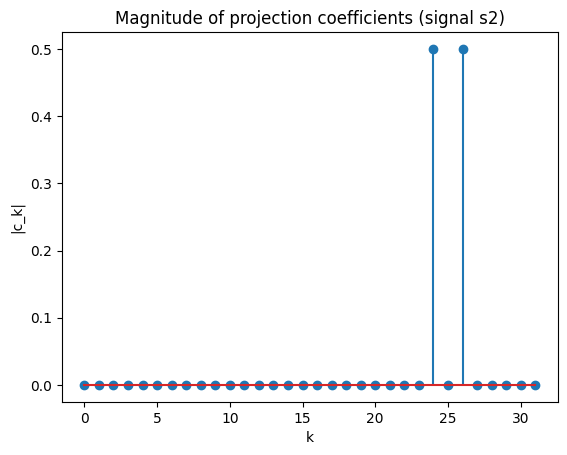

In [9]:
frequencies = [24, 26]
amplitudes = [1.0, 1.0]
s2 = generate_signal(p, frequencies, amplitudes)

coeffs2 = [get_projection_coefficient(s2, k, p) for k in ks]

plt.stem(ks, np.abs(coeffs2))
plt.xlabel("k")
plt.ylabel("|c_k|")
plt.title("Magnitude of projection coefficients (signal s2)")
plt.show()

Plot second signal

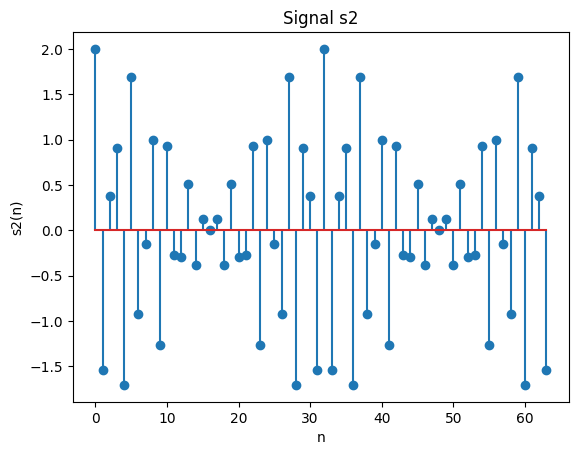

In [14]:
plt.stem(s2)
plt.xlabel("n")
plt.ylabel("s2(n)")
plt.title("Signal s2")
plt.show()